<h1 style="text-align:center; color: blue">WEBSCRAPING PROJECT USING PYTHON</h1>

<h3 style="color:blue;">TITLE: WEBSCRAPING PREMIER LEAGUE ALL-TIME LEAGUE TABLE DATA USING PYTHON AND SELENIUM </h3>

<h3 style="color:blue;">AUTHOR: Dolamu Oludare</h3>

<img src = './images/web.jpg' width = '1200' height='200'>

<h3 style="color:blue;">BACKGROUND OF THE ENGLISH PREMIER LEAGUE (EPL)</h3>

<p style='text-align: justify;'> The English premier league(EPL), also known as the Barclays Premier League, is a football league domiciled in England with inclusion of some Welsh football teams, it is the highest division football league in the country and it is also best and most watched league in the world. The league was founded on the 20th of February 1992, it is contested by 20 teams and it operates on a system of promotion and relegation with the English Football League (EFL). Season runs from the month of August all through May, with every team playing 38 games(playing all 19 other teams both home and away), The Premier League ranks first in the UEFA coefficients of leagues based on performances in European competitions over the past five seasons as of 2021. The English top-flight has produced the second-highest number of UEFA Champions League/European Cup titles, with five English clubs having won fourteen European trophies in total. For this project we would be scraping data information from the official website of the <a href = "premierleague.com" target = "_blank">English Premier league</a>. So let's get right into the heat of the action (Wembley!!!).</p>

<img src = './images/wembley.jpg'>

<p style = "text-align:justify;">The intent of this project is to get the all seasons premier league table. We would be using python and 2 webscraping python libraries: Selenium and BeautifulSoup, Selenium is a popular python webscraping libraries which is used to control a website dynamically in real time, while BeautifulSoup is used for parsing the website and getting contents from the subjected website.to learn more about selenuim, you can simply check out this <a href = "https://selenium-python.readthedocs.io/" target = _blank>link</a>. BeautifulSoup documentation is also found in <a href = "https://www.crummy.com/software/BeautifulSoup/bs4/doc/">here.</a></p>

<p style = 'text-align:justify;'>To utilize Selenium properly, you have to download the drivers for your browser, and the version of the drivers must coresspond with that of your browser. if you use chrome you can download the drivers <a href = "https://sites.google.com/a/chromium.org/chromedriver/downloads">here</a></p>

<h3 style="color:blue;">IMPORTING PYTHON LIBRARIES</h3>

In [31]:
import pandas as pd
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.common.action_chains import ActionChains
from bs4 import BeautifulSoup as bs
import warnings
import time

warnings.filterwarnings("ignore")

In [32]:
#copy the directory of the downloaded drivers and assign to a variable
# path = 'C:\\Users\\Hp\\Desktop\\CODE DEVS\\chromedriver.exe'
# path = 'C:\\Users\Dolzy\\AppData\\Local\\Google\\Chrome\\Application\\chromedriver.exe'
path = 'C:\\Development\\chromedriver.exe'


In [33]:
driver = webdriver.Chrome(path)

Once we run the driver code above, selenium automatically opens your browser in real time as shown below. if you observe the image below, there is a text that reads: **Chrome is being controlled by the automated test software**.

<img src = './images/Sel1.png'>

In [34]:
web = 'https://www.premierleague.com/tables?co=1&se=-1&ha=-1'
driver.get(web)


<img src = './images/Sel2.png'>

<p style='text-align: justify;'> Apparently, selenium has opened our premier league site, but we are trying to navigate our way to the tables page, we have to remove the Fantasy premier league Notification and also accept the cookies from the site as shown in the image above, this would enable us get our prime destination on the website </p>

In [35]:
#Accept cookies
accept_cookies =  driver.find_element(By.XPATH, '//*[@id="onetrust-accept-btn-handler"]')
accept_cookies.click()


Let's remove the budweiser advert by locating the XPATH of the button

In [36]:
#Remove Budweiser Notification
remove = driver.find_element(By.XPATH, '//*[@id="advertClose"]')
remove.click()

<img src = './images/Sel3.png'>

To click on the accept cookies, we copy the xpath tag of the button as shown below, and assign it to a variable, then use the selenium `.click()` method to accept cookies from your IDE, the outcome is shown in the image above.

In [40]:
press_filter = driver.find_element(By.XPATH, '//*[@id="mainContent"]/div[2]/div[1]/div[1]/section/div[5]/span')
press_filter.click()

<img src = './images/Sell.png'>

In [41]:
drop_downlist = driver.find_element(By.XPATH, '//*[@id="mainContent"]/div[2]/div[1]/div[1]/section/div[2]/div[2]')
drop_downlist.click()

In [42]:
select_allseason = driver.find_element(By.XPATH, '//*[@id="mainContent"]/div[2]/div[1]/div[1]/section/div[2]/ul/li[1]')
select_allseason.click()

In [43]:
apply_filter = driver.find_element(By.XPATH, '//*[@id="mainContent"]/div[2]/div[1]/div[1]/section/div[6]')
apply_filter.click()

<img src = './images/Sel9.png'>

In [45]:
#Getting the content of page
html = driver.page_source
#html

In [47]:
#Using Beautiful Soap to parse the html content of the page
soup = bs(html,'html.parser')
soup

<html lang="en" style="--vh:7px;"><head>
<meta content="Premier League Table, Form Guide &amp; Season Archives" name="twitter:title"/>
<meta content="Premier League, Football, Soccer, Official" name="keywords"/>
<meta content="website" property="og:type"/>
<meta content="View the latest Premier League tables, form guides and season archives, on the official website of the Premier League." name="description"/>
<meta content="View the latest Premier League tables, form guides and season archives, on the official website of the Premier League." name="twitter:description"/>
<meta content="https://s3.amazonaws.com/premierleague-static-files/premierleague/pl_icon.png" name="twitter:image"/>
<meta content="Premier League Table, Form Guide &amp; Season Archives" property="og:title"/>
<meta content="https://s3.amazonaws.com/premierleague-static-files/premierleague/pl_icon.png" property="og:image"/>
<meta content="#38003C" name="theme-color"/>
<title>Premier League Table, Form Guide &amp; Season

<h3 style="color:blue;">CODES TO SCRAPE THE LEAGUE TABLE</h3>

Writing viable codes for the intent of the project requires a study the given [website](https://www.premierleague.com/tables?co=1&se=-1&ha=-1) circumspectively, to do this we would need a surface knowlegde of the language that makes up the framework of the web, which is [HTML](https://www.w3schools.com/html/html_intro.asp) and [CSS](https://www.w3schools.com/css/default.asp). So we can navigate and study the codes of the site by right clicking on any portion of the site and from the drop down list that pops ups, we click on View PageSource as shown in the image below, this action immediately take us to the page source which shows the html codes that makes up the website.

<img src = './images/Pgsource.png'>

The page source of the website is shown below:

<img src = './images/Page_Source.png' height = '600'>

<p style='text-align: justify;'>Now that we have studied the framework of the website. Firstly, we would like to scrape the columns of the table since we have located the html tag that carries the table, that would be our focus for this project, the use of Python loops would be predominant in this project. The tag carrying the columns is thead, so we would use Beautiful soap to extract this information using the find() method. The codes are shown below:</p>

In [48]:
table_columns = soup.find('thead')
table_columns

<thead> <tr> <th class="text-centre" scope="col"> <div class="thFull">Position</div> <div class="thShort"></div> </th> <th class="team" scope="col">Club</th> <th scope="col"> <div class="thFull">Played</div> <div class="thShort">Pl</div> </th> <th scope="col"> <div class="thFull">Won</div> <div class="thShort">W</div> </th> <th scope="col"> <div class="thFull">Drawn</div> <div class="thShort">D</div> </th> <th scope="col"> <div class="thFull">Lost</div> <div class="thShort">Lost</div> </th> <th class="hideSmall" scope="col"><abbr title="Goals For">GF</abbr></th> <th class="hideSmall" scope="col"><abbr title="Goals Against">GA</abbr></th> <th scope="col"><abbr title="Goal Difference">GD</abbr></th> <th class="points" scope="col"> <div class="thFull">Points</div> <div class="thShort">Pts</div> </th> </tr> </thead>

In [67]:
for word in table_columns.find_all('tr'):
    ray = word.find_all('th')
    for i in ray:
        print(i)

<th class="text-centre" scope="col"> <div class="thFull">Position</div> <div class="thShort"></div> </th>
<th class="team" scope="col">Club</th>
<th scope="col"> <div class="thFull">Played</div> <div class="thShort">Pl</div> </th>
<th scope="col"> <div class="thFull">Won</div> <div class="thShort">W</div> </th>
<th scope="col"> <div class="thFull">Drawn</div> <div class="thShort">D</div> </th>
<th scope="col"> <div class="thFull">Lost</div> <div class="thShort">Lost</div> </th>
<th class="hideSmall" scope="col"><abbr title="Goals For">GF</abbr></th>
<th class="hideSmall" scope="col"><abbr title="Goals Against">GA</abbr></th>
<th scope="col"><abbr title="Goal Difference">GD</abbr></th>
<th class="points" scope="col"> <div class="thFull">Points</div> <div class="thShort">Pts</div> </th>


The code above outputs the html tags of the table columns, and from the tags we can see that the class of the tags are not uniform. For instance, the class tag for Club is `team`, while that of Goal For and Goal Against is `hidesmall`. So we would have to extract them different and append each of the into a list as shown in the codes below:

In [68]:
columns = []
for word in table_columns.find_all('tr'):
    ray = word.find('th',class_ = 'team').text
    columns.append(ray)
    print(columns)

['Club']


In [98]:
coke = []
for word in table_columns.find_all('tr'):
    for row in word.find_all('abbr'):
        coke.append(row.attrs['title'])
print(coke)
    

['Goals For', 'Goals Against', 'Goal Difference']


In [99]:
column = []
c = columns[0]
for word in table_columns.find_all('tr'):
        for typer in word.find_all('div',class_='thFull'):
            abe = typer.text
            column.append(abe)
            
column.append(c)
for i in range(len(coke)):
    column.append(coke[i])
print((column))        

['Position', 'Played', 'Won', 'Drawn', 'Lost', 'Points', 'Club', 'Goals For', 'Goals Against', 'Goal Difference']


In [100]:
column

['Position',
 'Played',
 'Won',
 'Drawn',
 'Lost',
 'Points',
 'Club',
 'Goals For',
 'Goals Against',
 'Goal Difference']

In [101]:
column[1],column[-4] = column[6],column[1]

In [102]:
column

['Position',
 'Club',
 'Won',
 'Drawn',
 'Lost',
 'Points',
 'Played',
 'Goals For',
 'Goals Against',
 'Goal Difference']

In [103]:
column[5],column[-1] = column[-1],column[5]

In [104]:
# num = column.index('Played')
# column[]

In [105]:
column[5], column[6] = column[6], column[5]
column[4], column[5]  = column[5], column[4]
column[3], column[4]  = column[4], column[3]
column[2], column[3]  = column[3], column[2]

In [110]:
column

['Position',
 'Club',
 'Played',
 'Won',
 'Drawn',
 'Lost',
 'Goal Difference',
 'Goals For',
 'Goals Against',
 'Points']

In [111]:
full_data = soup.find('table')
#full_data


Now we are going to extract the clubs column, the code for this is shown below:

In [112]:
Clubs = []

for team in full_data.find_all('tbody'):
    row = team.find_all('tr', class_='expandable')
    for rows in row:
        kry = rows.find('span',class_= 'teamName').text
        Clubs.append(kry)
print(Clubs)

['Manchester United', 'Arsenal', 'Chelsea', 'Liverpool', 'Tottenham Hotspur', 'Manchester City', 'Everton', 'Newcastle United', 'Aston Villa', 'West Ham United', 'Southampton', 'Blackburn Rovers', 'Leeds United', 'Leicester City', 'Fulham', 'Middlesbrough', 'Sunderland', 'Crystal Palace', 'Bolton Wanderers', 'West Bromwich Albion', 'Stoke City', 'Coventry City', 'Norwich City', 'Sheffield Wednesday', 'Wimbledon', 'Wolverhampton Wanderers', 'Charlton Athletic', 'Wigan Athletic', 'Burnley', 'Swansea City', 'Queens Park Rangers', 'Birmingham City', 'Portsmouth', 'Watford', 'Derby County', 'Nottingham Forest', 'Brighton & Hove Albion', 'Bournemouth', 'Ipswich Town', 'Sheffield United', 'Hull City', 'Reading', 'Brentford', 'Oldham Athletic', 'Cardiff City', 'Bradford City', 'Huddersfield Town', 'Blackpool', 'Barnsley', 'Swindon Town']


Finally, we would extract the remaining features of the table, since this feature all lie in the same tag, we would be extracting them together, we would set up an empty list for each feature, initiate a loop through the tag and append them sequentially into the list as shown in the codes below:

In [173]:
Games_played= []
Won = []
Drawn = []
Lost = []
GF = []
GA = []
GD = []
Points = []

for team in full_data.find_all('tbody'):
    print(team) # prints element
    print()
    print()
    print()
    row = team.find_all('tr', attrs={'data-filtered-entry-size':'50'})
    print(row)
    for rows in row:
        point = rows.find_all('td')
        Games_played.append(point[2].text)
        Won.append(point[3].text)
        Drawn.append(point[4].text)
        Lost.append(point[5].text)
        GF.append(point[6].text)
        GA.append(point[7].text)
        GD.append(point[8].text)
        Points.append(point[9].text)


<tbody class="tableBodyContainer"> <tr class="tableDark" data-compseason="" data-filtered-entry-size="50" data-filtered-table-row="12" data-filtered-table-row-abbr="MUN" data-filtered-table-row-name="Manchester United"> <td class="pos button-tooltip" id="Tooltip" tabindex="0"> <span class="value">1</span> <span class="movement hidden"> <span class="tooltipContainer tooltip-left" role="tooltip"> <span class="tooltip-content">Previous Position <span class="resultHighlight">1 </span> </span> </span> </span> </td> <td class="team" scope="row"> <a href="//www.premierleague.com/clubs/12/Manchester-United/overview"> <span class="badge badge-image-container" data-size="25" data-widget="club-badge-image"> <img class="badge-image badge-image--25 js-badge-image" src="https://resources.premierleague.com/premierleague/badges/25/t1.png" srcset="https://resources.premierleague.com/premierleague/badges/25/t1.png, https://resources.premierleague.com/premierleague/badges/25/t1@x2.png 2x"/> </span> <span

<h3 style="color:blue;">CROSS CHECKING THE CONTENT</h3>

Lets double check all our extracted contents to be certain we are on the right track and ready to move to the next step. 

In [114]:
column

['Position',
 'Club',
 'Played',
 'Won',
 'Drawn',
 'Lost',
 'Goal Difference',
 'Goals For',
 'Goals Against',
 'Points']

In [115]:
Clubs

['Manchester United',
 'Arsenal',
 'Chelsea',
 'Liverpool',
 'Tottenham Hotspur',
 'Manchester City',
 'Everton',
 'Newcastle United',
 'Aston Villa',
 'West Ham United',
 'Southampton',
 'Blackburn Rovers',
 'Leeds United',
 'Leicester City',
 'Fulham',
 'Middlesbrough',
 'Sunderland',
 'Crystal Palace',
 'Bolton Wanderers',
 'West Bromwich Albion',
 'Stoke City',
 'Coventry City',
 'Norwich City',
 'Sheffield Wednesday',
 'Wimbledon',
 'Wolverhampton Wanderers',
 'Charlton Athletic',
 'Wigan Athletic',
 'Burnley',
 'Swansea City',
 'Queens Park Rangers',
 'Birmingham City',
 'Portsmouth',
 'Watford',
 'Derby County',
 'Nottingham Forest',
 'Brighton & Hove Albion',
 'Bournemouth',
 'Ipswich Town',
 'Sheffield United',
 'Hull City',
 'Reading',
 'Brentford',
 'Oldham Athletic',
 'Cardiff City',
 'Bradford City',
 'Huddersfield Town',
 'Blackpool',
 'Barnsley',
 'Swindon Town']

In [116]:
len(Clubs)

50

In [117]:
Won

['720',
 '642',
 '628',
 '621',
 '518',
 '494',
 '424',
 '397',
 '368',
 '343',
 '280',
 '262',
 '223',
 '216',
 '173',
 '165',
 '153',
 '153',
 '149',
 '117',
 '116',
 '99',
 '99',
 '101',
 '99',
 '98',
 '93',
 '85',
 '83',
 '82',
 '81',
 '73',
 '79',
 '73',
 '68',
 '66',
 '61',
 '64',
 '57',
 '53',
 '41',
 '32',
 '23',
 '22',
 '17',
 '14',
 '12',
 '10',
 '10',
 '5']

In [118]:
len(Won)

50

In [119]:
Games_played

['1181',
 '1182',
 '1182',
 '1181',
 '1182',
 '991',
 '1182',
 '1063',
 '1068',
 '1025',
 '916',
 '696',
 '574',
 '642',
 '599',
 '574',
 '608',
 '532',
 '494',
 '494',
 '380',
 '354',
 '392',
 '316',
 '316',
 '334',
 '304',
 '304',
 '304',
 '266',
 '278',
 '266',
 '266',
 '304',
 '266',
 '228',
 '218',
 '220',
 '202',
 '198',
 '190',
 '114',
 '68',
 '84',
 '76',
 '76',
 '76',
 '38',
 '38',
 '42']

In [120]:
len(Games_played)

50

In [121]:
Drawn

['262',
 '288',
 '293',
 '290',
 '286',
 '214',
 '329',
 '275',
 '301',
 '259',
 '246',
 '184',
 '149',
 '164',
 '160',
 '169',
 '159',
 '138',
 '128',
 '139',
 '109',
 '112',
 '105',
 '89',
 '94',
 '85',
 '82',
 '76',
 '76',
 '66',
 '65',
 '82',
 '65',
 '66',
 '70',
 '68',
 '72',
 '49',
 '53',
 '50',
 '48',
 '23',
 '20',
 '23',
 '13',
 '20',
 '17',
 '9',
 '5',
 '15']

In [122]:
len(Drawn)

50

In [123]:
Lost

['199',
 '252',
 '261',
 '270',
 '378',
 '283',
 '429',
 '391',
 '399',
 '423',
 '390',
 '250',
 '202',
 '262',
 '266',
 '240',
 '296',
 '241',
 '217',
 '238',
 '155',
 '143',
 '188',
 '126',
 '123',
 '151',
 '129',
 '143',
 '145',
 '118',
 '132',
 '111',
 '122',
 '165',
 '128',
 '94',
 '85',
 '107',
 '92',
 '95',
 '101',
 '59',
 '25',
 '39',
 '46',
 '42',
 '47',
 '19',
 '23',
 '22']

In [124]:
len(Lost)

50

In [125]:
GF

['2229',
 '2089',
 '2002',
 '2071',
 '1800',
 '1733',
 '1514',
 '1425',
 '1306',
 '1262',
 '1102',
 '927',
 '784',
 '860',
 '670',
 '648',
 '612',
 '576',
 '575',
 '510',
 '398',
 '387',
 '414',
 '409',
 '384',
 '352',
 '342',
 '316',
 '300',
 '306',
 '339',
 '273',
 '292',
 '310',
 '271',
 '253',
 '242',
 '269',
 '219',
 '187',
 '181',
 '136',
 '95',
 '105',
 '66',
 '68',
 '50',
 '55',
 '37',
 '47']

In [126]:
len(GF)

50

In [127]:
GA

['1103',
 '1177',
 '1156',
 '1182',
 '1480',
 '1095',
 '1524',
 '1438',
 '1393',
 '1468',
 '1333',
 '907',
 '760',
 '920',
 '871',
 '794',
 '904',
 '766',
 '745',
 '772',
 '525',
 '490',
 '669',
 '453',
 '472',
 '504',
 '442',
 '482',
 '455',
 '383',
 '431',
 '360',
 '380',
 '518',
 '420',
 '341',
 '294',
 '387',
 '312',
 '270',
 '323',
 '186',
 '96',
 '142',
 '143',
 '138',
 '134',
 '78',
 '82',
 '100']

In [128]:
len(GA)

50

In [129]:
GD

['1126',
 '912',
 '846',
 '889',
 '320',
 '638',
 '-10',
 '-13',
 '-87',
 '-206',
 '-231',
 '20',
 '24',
 '-60',
 '-201',
 '-146',
 '-292',
 '-190',
 '-170',
 '-262',
 '-127',
 '-103',
 '-255',
 '-44',
 '-88',
 '-152',
 '-100',
 '-166',
 '-155',
 '-77',
 '-92',
 '-87',
 '-88',
 '-208',
 '-149',
 '-88',
 '-52',
 '-118',
 '-93',
 '-83',
 '-142',
 '-50',
 '-1',
 '-37',
 '-77',
 '-70',
 '-84',
 '-23',
 '-45',
 '-53']

In [130]:
len(GD)

50

In [131]:
Points

['2422',
 '2214',
 '2177',
 '2153',
 '1840',
 '1696',
 '1601',
 '1466',
 '1405',
 '1288',
 '1086',
 '970',
 '818',
 '812',
 '679',
 '661',
 '618',
 '597',
 '575',
 '490',
 '457',
 '409',
 '402',
 '392',
 '391',
 '379',
 '361',
 '331',
 '325',
 '312',
 '308',
 '301',
 '293',
 '285',
 '274',
 '266',
 '255',
 '241',
 '224',
 '209',
 '171',
 '119',
 '89',
 '89',
 '64',
 '62',
 '53',
 '39',
 '35',
 '30']

In [132]:
len(Points)

50

In [133]:
Position = list(range(1,51))
len(Position)

50

<h3 style="color:blue;">ORGANIZING OUR DATA</h3>

Now that we have successfully scraped our data off the site, the next step is to organize our data and embed them in a dataframe, first we organize the data in a python dictionary and convert it to a dataframe.

In [134]:
data = {'Position': Position,'Clubs': Clubs, 'Games_Played': Games_played, 'Game_Won': Won, 
        'Games_Drawn': Drawn, 'Games_Lost':Lost,'GF':GF,'GA':GA,'GD':GD,'Point':Points}

In [135]:
pl_table = pd.DataFrame(data)

In [136]:
pl_table.set_index('Position')

,Clubs,Games_Played,Game_Won,Games_Drawn,Games_Lost,GF,GA,GD,Point
Position,,,,,,,,,
1,Manchester United,1181,720,262,199,2229,1103,1126,2422
2,Arsenal,1182,642,288,252,2089,1177,912,2214
3,Chelsea,1182,628,293,261,2002,1156,846,2177
4,Liverpool,1181,621,290,270,2071,1182,889,2153
5,Tottenham Hotspur,1182,518,286,378,1800,1480,320,1840
6,Manchester City,991,494,214,283,1733,1095,638,1696
7,Everton,1182,424,329,429,1514,1524,-10,1601
8,Newcastle United,1063,397,275,391,1425,1438,-13,1466
9,Aston Villa,1068,368,301,399,1306,1393,-87,1405


We finally have our table!!!!

In [137]:
pl_table.set_index('Position',inplace=True)

In [138]:
pl_table.head(3)

,Clubs,Games_Played,Game_Won,Games_Drawn,Games_Lost,GF,GA,GD,Point
Position,,,,,,,,,
1,Manchester United,1181,720,262,199,2229,1103,1126,2422
2,Arsenal,1182,642,288,252,2089,1177,912,2214
3,Chelsea,1182,628,293,261,2002,1156,846,2177


In [139]:
pl_table.shape

(50, 9)

In [140]:
pl_table.columns

Index(['Clubs', 'Games_Played', 'Game_Won', 'Games_Drawn', 'Games_Lost', 'GF',
       'GA', 'GD', 'Point'],
      dtype='object')

In [141]:
pl_table.index

Index([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36,
       37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50],
      dtype='int64', name='Position')

In [142]:
pl_table.size

450

In [143]:
pl_table.info()

<class 'pandas.core.frame.DataFrame'>
Index: 50 entries, 1 to 50
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Clubs         50 non-null     object
 1   Games_Played  50 non-null     object
 2   Game_Won      50 non-null     object
 3   Games_Drawn   50 non-null     object
 4   Games_Lost    50 non-null     object
 5   GF            50 non-null     object
 6   GA            50 non-null     object
 7   GD            50 non-null     object
 8   Point         50 non-null     object
dtypes: object(9)
memory usage: 3.9+ KB


we can see from the information of our data types that some of the features are not in the right data types, for example the Game_Played is an integer type but the it is denoted as an object type, so let's make some changes to this.

In [144]:
pl_table['Games_Played'] = pl_table['Games_Played'].astype('int')
pl_table['Game_Won'] = pl_table['Game_Won'].astype('int')
pl_table['Games_Drawn'] = pl_table['Games_Drawn'].astype('int')
pl_table['Games_Lost'] = pl_table['Games_Lost'].astype('int')
pl_table['GF'] = pl_table['GF'].astype('int')
pl_table['GA'] = pl_table['GA'].astype('int')
pl_table['GD'] = pl_table['GD'].astype('int')
pl_table['Point'] = pl_table['Point'].astype('int')

In [145]:
pl_table.dtypes.head(9)

Clubs           object
Games_Played     int32
Game_Won         int32
Games_Drawn      int32
Games_Lost       int32
GF               int32
GA               int32
GD               int32
Point            int32
dtype: object

In [146]:
pl_table.head(5)

,Clubs,Games_Played,Game_Won,Games_Drawn,Games_Lost,GF,GA,GD,Point
Position,,,,,,,,,
1,Manchester United,1181,720,262,199,2229,1103,1126,2422
2,Arsenal,1182,642,288,252,2089,1177,912,2214
3,Chelsea,1182,628,293,261,2002,1156,846,2177
4,Liverpool,1181,621,290,270,2071,1182,889,2153
5,Tottenham Hotspur,1182,518,286,378,1800,1480,320,1840


In [147]:
pl_table.tail(5)

,Clubs,Games_Played,Game_Won,Games_Drawn,Games_Lost,GF,GA,GD,Point
Position,,,,,,,,,
46,Bradford City,76,14,20,42,68,138,-70,62
47,Huddersfield Town,76,12,17,47,50,134,-84,53
48,Blackpool,38,10,9,19,55,78,-23,39
49,Barnsley,38,10,5,23,37,82,-45,35
50,Swindon Town,42,5,15,22,47,100,-53,30


In [148]:
#pl_table['Win_ratio'].fillna(0, inplace=True)

In [149]:
pl_table.describe()

,Games_Played,Game_Won,Games_Drawn,Games_Lost,GF,GA,GD,Point
count,50.000000,50.000000,50.000000,50.000000,50.000000,50.00000,50.000000,50.000000
mean,477.680000,177.240000,123.200000,177.240000,635.960000,635.96000,0.000000,654.680000
std,376.391266,190.007257,94.586965,113.880991,622.626988,429.96274,315.336814,657.689103
min,38.000000,5.000000,5.000000,19.000000,37.000000,78.00000,-292.000000,30.000000
25%,218.500000,61.750000,56.000000,96.500000,244.750000,327.50000,-148.250000,244.500000
50%,316.000000,98.500000,87.000000,144.000000,368.000000,486.00000,-87.000000,385.000000
75%,633.500000,221.250000,167.750000,251.500000,841.000000,906.25000,-38.750000,816.500000
max,1182.000000,720.000000,329.000000,429.000000,2229.000000,1524.00000,1126.000000,2422.000000


In [150]:
#Extrating first 10 rows and 2 columns using the iloc method
pl_table.iloc[:9,0:2]

,Clubs,Games_Played
Position,,
1,Manchester United,1181
2,Arsenal,1182
3,Chelsea,1182
4,Liverpool,1181
5,Tottenham Hotspur,1182
6,Manchester City,991
7,Everton,1182
8,Newcastle United,1063
9,Aston Villa,1068


In [151]:
#Extracting the 
pl_table.loc[1:9,'Clubs':'GA']

,Clubs,Games_Played,Game_Won,Games_Drawn,Games_Lost,GF,GA
Position,,,,,,,
1,Manchester United,1181,720,262,199,2229,1103
2,Arsenal,1182,642,288,252,2089,1177
3,Chelsea,1182,628,293,261,2002,1156
4,Liverpool,1181,621,290,270,2071,1182
5,Tottenham Hotspur,1182,518,286,378,1800,1480
6,Manchester City,991,494,214,283,1733,1095
7,Everton,1182,424,329,429,1514,1524
8,Newcastle United,1063,397,275,391,1425,1438
9,Aston Villa,1068,368,301,399,1306,1393


<h3 style="color:blue;">Feature Engineering</h3>

`Feature Engineering` is the process of using domain knowledge of the data to create features that make machine learning algorithms work. Feature engineering is fundamental to the application of machine learning and is both difficult and expensive.(source: [Wikipedia](https://en.wikipedia.org/wiki/Feature_engineering#:~:text=Feature%20engineering%20is%20the%20process,%2C%20attributes) )


#### WIN RATIO FEATURE
We would engineer a feature called `Win ratio` or `Win Percentage`, this feature is a statistical measure utilized in football to guage the performance of a team or the influence of a coach on a teams performance. the formula for this feature is written below:

\begin{align}
Win\space Ratio = \frac{Total\space Number \space of \space Games \space Won}{Total\space Number \space of \space Games \space Played}
\end{align}

In [152]:
pl_table['Win_ratio'] = pl_table['Game_Won']/pl_table['Games_Played'] 

In [153]:
pl_table['Win_ratio'] = round(pl_table['Win_ratio'],2)

#### CLASSIFYING TEAMS INTO THEIR CURRENT LEAGUE STATUS.

In [154]:
pl_clubs = ['Manchester United','Manchester City','Arsenal','Chelsea','Tottenham Hotspur','Everton',
           'West Ham United','Southampton','Newcastle United','Liverpool','Crystal Palace','Wolverhampton Wanderers',
            'Watford','Burnley','Leicester City','Leeds United','Aston Villa',
            'Brighton and Hove Albion','Norwich City','Brentford']


champ = ['Barnsley','Birmingham City','Blackburn Rovers','Blackpool','Bournemouth','Bristol City','Cardiff City',
        'Coventry City','Derby County','Fulham','Huddersfield Town','Hull City',
         'Luton Town','Middlesbrough','Millwall','Nottingham Forest','Peterborough United',
         'Preston North End','Queens Park Rangers','Reading','Sheffield United',
         'Stoke City','Swansea City','West Bromwich Albion']


def league_status(club):
    if club in pl_clubs:
        return 'Premier League Club'
    elif club in champ:
        return 'Championship Club'
    else:
        return 'Lower Division Club'

In [157]:
pl_table['Status'] = pl_table['Clubs'].apply(league_status)

In [158]:
pl_table

,Clubs,Games_Played,Game_Won,Games_Drawn,Games_Lost,GF,GA,GD,Point,Win_ratio,Status
Position,,,,,,,,,,,
1,Manchester United,1181,720,262,199,2229,1103,1126,2422,0.61,Premier League Club
2,Arsenal,1182,642,288,252,2089,1177,912,2214,0.54,Premier League Club
3,Chelsea,1182,628,293,261,2002,1156,846,2177,0.53,Premier League Club
4,Liverpool,1181,621,290,270,2071,1182,889,2153,0.53,Premier League Club
5,Tottenham Hotspur,1182,518,286,378,1800,1480,320,1840,0.44,Premier League Club
6,Manchester City,991,494,214,283,1733,1095,638,1696,0.50,Premier League Club
7,Everton,1182,424,329,429,1514,1524,-10,1601,0.36,Premier League Club
8,Newcastle United,1063,397,275,391,1425,1438,-13,1466,0.37,Premier League Club
9,Aston Villa,1068,368,301,399,1306,1393,-87,1405,0.34,Premier League Club


<h3 style="color:blue;">Basic Data Analysis</h3>

<img src = './images/PL4.jpg'>

We would be carrying out some simple exploration on the data, for this purpose we would answering some simple and insightful question, the questions to be answered are shown below:


## QUESTIONS?

1. Top 6 Clubs with most numbers of Games played




2. Top 6 clubs with the least number of Games played




3. Top 6 clubs with the Most number of Games won




4. Top 6 clubs with the least number of Games won




5. Top 6 clubs with most Games Drawn




6. Clubs that have lost more than 200 games




7. Top 10 clubs with the Most Goals conceded


<h3>Distribution of League Status</h3>

In [159]:
bee = pl_table['Status'].value_counts()
car = list(bee.index)
car

['Premier League Club', 'Championship Club', 'Lower Division Club']

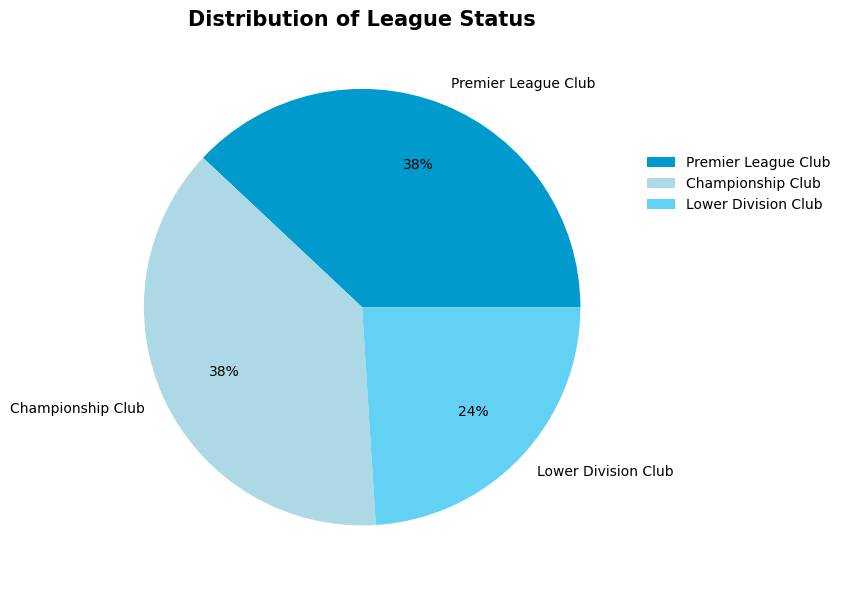

In [161]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(8,6), tight_layout=True)
color = ['#009ACD', '#ADD8E6', '#63D1F4', '#0EBFE9',   
                      '#C1F0F6', '#0099CC']
explode_listt = (0,0,0)
plt.pie(pl_table['Status'].value_counts(),labels = car, autopct='%1.0f%%',
        explode=explode_listt, pctdistance=.7,
          colors=color[0:3], shadow=False)
plt.title('Distribution of League Status',weight='bold',fontsize=15)
plt.legend(frameon=False, bbox_to_anchor=(1.0,0.8))
plt.show()

from the the pie chart above, it is evident that 40 percent of the clubs in the all-time Premier league table are currently in the higher division, a bit over a third of the clubs are in the English championship which is the next division after the premier league. about one quarter of the clubs are in the lower division league currently.

### 1. Top 6 Clubs with most numbers of games played

In [162]:
pl_table.sort_values('Games_Played', ascending=False)[['Clubs','Games_Played']].head(6)

,Clubs,Games_Played
Position,,
2,Arsenal,1182
3,Chelsea,1182
5,Tottenham Hotspur,1182
7,Everton,1182
1,Manchester United,1181
4,Liverpool,1181


<p style="text-align:justify;" >As expected the clubs with the most appearance are the Big clubs in the league, and surprisingly Everton makes the list, it is also important to note that this clubs have never been relegated to the lower divison. Additionally I noticed the absence of Manhester City on the list, meaning they have been relegated to the lower division at one point in time in the course of their existence as a football club.</p>

### 2. Top 6 clubs with the least number of gamed played

In [163]:
pl_table.sort_values('Games_Played', ascending=True)[['Clubs','Games_Played']].head(6)

,Clubs,Games_Played
Position,,
49,Barnsley,38
48,Blackpool,38
50,Swindon Town,42
43,Brentford,68
46,Bradford City,76
45,Cardiff City,76


<p style="text-align:justify;">From the table, Brentford has played the least number of games in the league, this is because they just gained promotion to the premier league for the first time and they are yet to play their first game in the league which is against Arsenal, and scheduled to take place on the 13th August 2021, hopefully they win the game. The other clubs on the league are evidently poor in form at the moment and playing in the lower division leagues.</p>

### 3. Top 6 clubs with the Most number of games won

In [164]:
pl_table.sort_values('Game_Won', ascending=False)[['Clubs','Game_Won']].head(6)

,Clubs,Game_Won
Position,,
1,Manchester United,720
2,Arsenal,642
3,Chelsea,628
4,Liverpool,621
5,Tottenham Hotspur,518
6,Manchester City,494


As expected the Big six clubs occupy this list

### 4. Top 6 clubs with the Least number of games won

In [165]:
pl_table.sort_values('Game_Won', ascending=True)[['Clubs','Game_Won']].head(6)

,Clubs,Game_Won
Position,,
50,Swindon Town,5
49,Barnsley,10
48,Blackpool,10
47,Huddersfield Town,12
46,Bradford City,14
45,Cardiff City,17


### 5. Top 6 clubs with most games Drawn

In [166]:
draw = pl_table.sort_values('Games_Drawn', ascending=False)[['Clubs','Games_Drawn']].head(6)
draw

,Clubs,Games_Drawn
Position,,
7,Everton,329
9,Aston Villa,301
3,Chelsea,293
4,Liverpool,290
2,Arsenal,288
5,Tottenham Hotspur,286


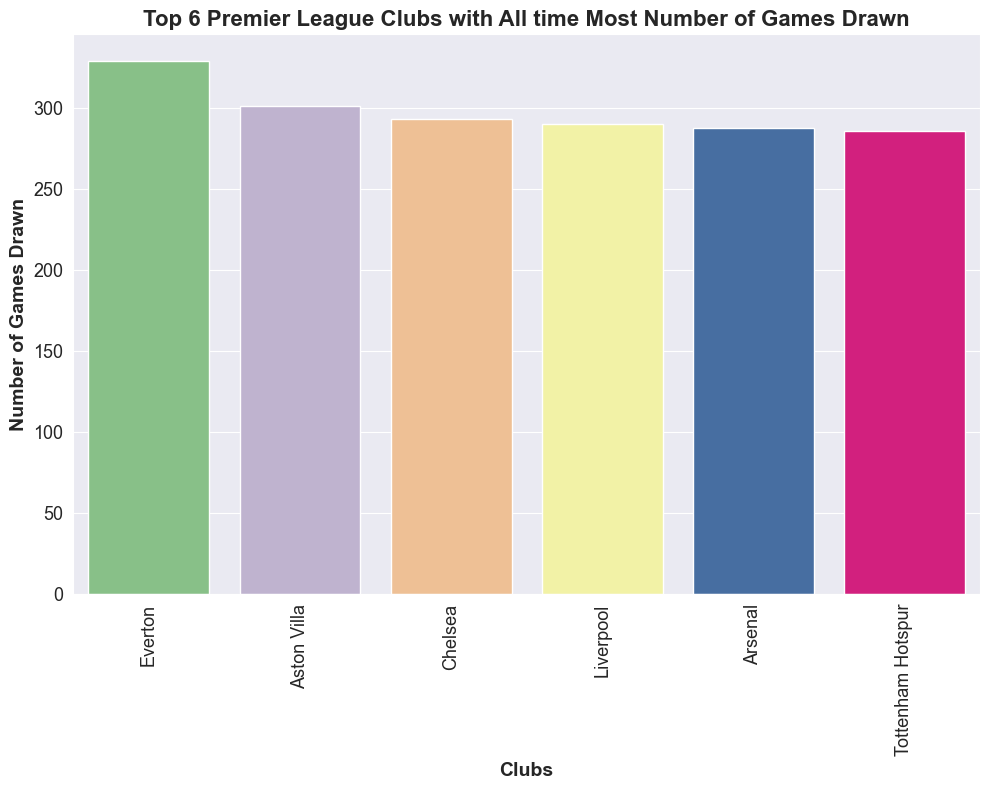

In [167]:
plt.figure(figsize=(10,8), tight_layout=True)
color = sns.color_palette('deep')
sns.set_style('darkgrid')
ax = sns.barplot(x = draw['Clubs'],y = draw['Games_Drawn'], palette = 'Accent', errwidth=10)
plt.xlabel('Clubs', fontsize=14, weight='bold')
plt.ylabel('Number of Games Drawn', fontsize=14, weight='bold')
plt.xticks(fontsize=13,rotation=90)
plt.yticks(fontsize=13)
plt.title('Top 6 Premier League Clubs with All time Most Number of Games Drawn', fontsize=16, weight='bold')
plt.show();

Everton has drawn the most number of games in the league since it's inception, and Arsenal, Tottenham, Liverpool and Chelsea surprisingly have had a lot of stalemates in the league, with each of them sharing points with their opposition more than 250 times.

### 6.  Clubs that have lost more than 200 games

In [168]:
key = pl_table[pl_table['Games_Lost'] > 200][['Clubs','Games_Lost']].sort_values('Games_Lost',ascending=False)
key

,Clubs,Games_Lost
Position,,
7,Everton,429
10,West Ham United,423
9,Aston Villa,399
8,Newcastle United,391
11,Southampton,390
5,Tottenham Hotspur,378
17,Sunderland,296
6,Manchester City,283
4,Liverpool,270


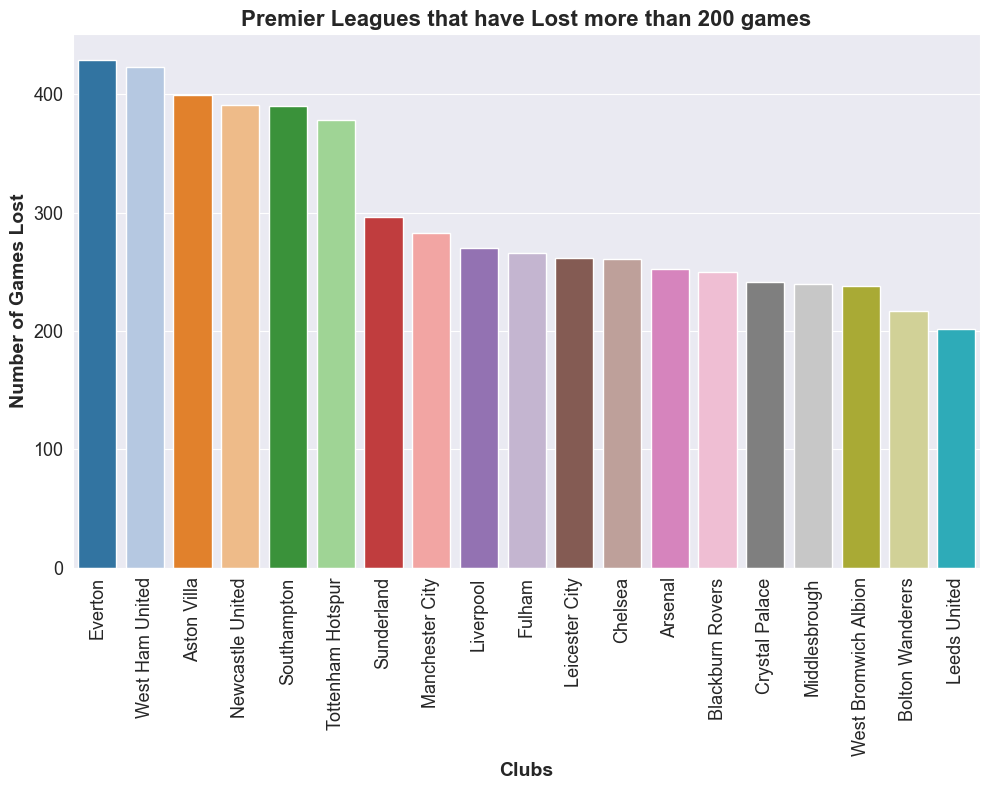

In [169]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10,8), tight_layout=True)
color = sns.color_palette('deep')[:10]
sns.set_style('darkgrid')
ax = sns.barplot(x = key['Clubs'],y = key['Games_Lost'], palette = 'tab20')
ax.set(title='Premier Leagues that have Lost more than 200 games')
plt.xlabel('Clubs', fontsize=14, weight='bold')
plt.ylabel('Number of Games Lost', fontsize=14, weight='bold')
plt.xticks(fontsize=13,rotation=90)
plt.yticks(fontsize=13)
plt.title('Premier Leagues that have Lost more than 200 games', fontsize=16, weight='bold')
plt.show();

### 7. Top 10 clubs with Most Goals Conceded

In [170]:
big_10 = pl_table.sort_values('GA', ascending=True)[['Clubs','GA']].tail(10)
big_10

,Clubs,GA
Position,,
1,Manchester United,1103
3,Chelsea,1156
2,Arsenal,1177
4,Liverpool,1182
11,Southampton,1333
9,Aston Villa,1393
8,Newcastle United,1438
10,West Ham United,1468
5,Tottenham Hotspur,1480


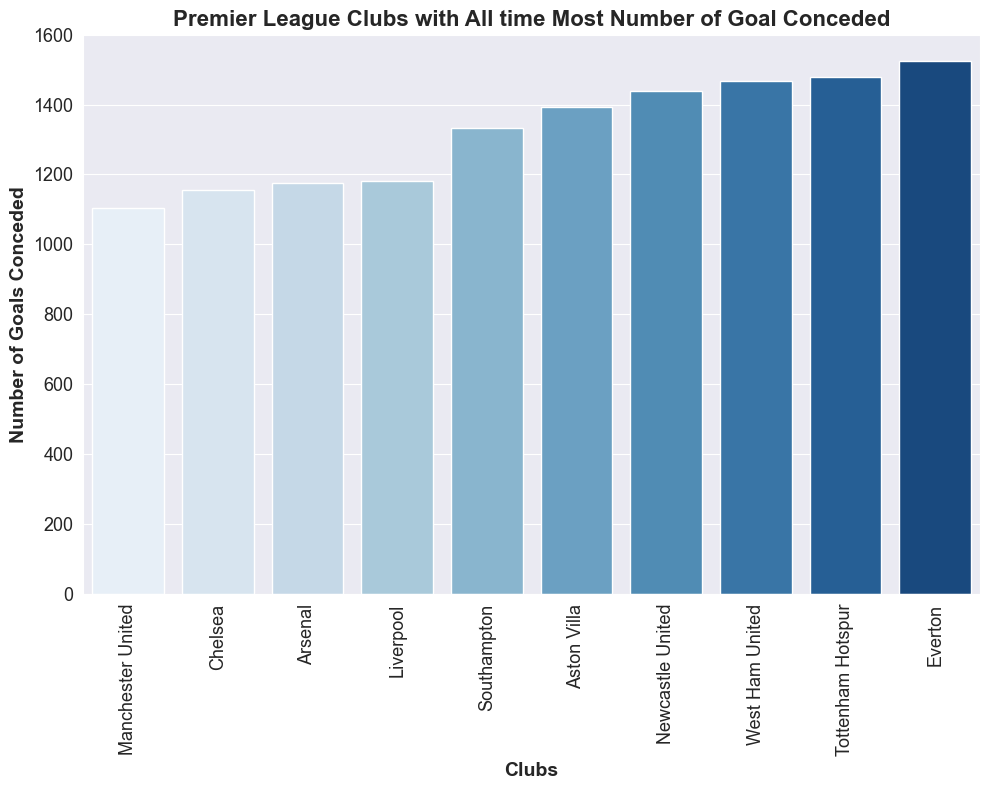

In [171]:
plt.figure(figsize=(10,8), tight_layout=True)
color = sns.color_palette('deep')
sns.set_style('darkgrid')
ax = sns.barplot(x = big_10['Clubs'],y = big_10['GA'], palette = 'Blues')
ax.set(title='Premier League Clubs with All time Most Number of Goal Conceded')
plt.xlabel('Clubs', fontsize=14, weight='bold')
plt.ylabel('Number of Goals Conceded', fontsize=14, weight='bold')
plt.xticks(fontsize=13,rotation=90)
plt.yticks(fontsize=13)
plt.title('Premier League Clubs with All time Most Number of Goal Conceded', fontsize=16, weight='bold')
plt.show();